In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import zscore
import matplotlib.pyplot  as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv


In [2]:
path = "/kaggle/input/netflix-tv-shows-and-movies/"
credits = pd.read_csv(path + "credits.csv")
titles = pd.read_csv(path + "titles.csv")

In [3]:
#Display the first few rows in bith dataframes
display("credit first five"," ",
       credits.head(),
       "title first five", " ",
       titles.head())

'credit first five'

' '

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


'title first five'

' '

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [4]:
#Summary stats for num values
display("credit stats"," ",
       credits.describe().T,
        "title stats", " ",
        titles.describe().T
       )

'credit stats'

' '

,count,mean,std,min,25%,50%,75%,max
person_id,77801.0,529488.806442,643016.669958,7.0,45306.0,198358.0,888096.0,2462818.0


'title stats'

' '

,count,mean,std,min,25%,50%,75%,max
release_year,5850.0,2016.417094,6.937726,1945.000000,2016.0000,2018.000,2020.0000,2022.000
runtime,5850.0,76.888889,39.002509,0.000000,44.0000,83.000,104.0000,240.000
seasons,2106.0,2.162868,2.689041,1.000000,1.0000,1.000,2.0000,42.000
imdb_score,5368.0,6.510861,1.163826,1.500000,5.8000,6.600,7.3000,9.600
imdb_votes,5352.0,23439.382474,95820.470909,5.000000,516.7500,2233.500,9494.0000,2294231.000
tmdb_popularity,5759.0,22.637925,81.680263,0.009442,2.7285,6.821,16.5900,2274.044
tmdb_score,5539.0,6.829175,1.170391,0.500000,6.1000,6.900,7.5375,10.000


In [5]:
#Check info on column names and data types
display("credit information", " ",
       credits.info(),
       "title information", " ",
       titles.info()
       )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7 

'credit information'

' '

None

'title information'

' '

None

In [6]:
#Check missing values
display("credit missing vals"," ",
       credits.isna().sum(),
        "title missing values", " ",
        titles.isna().sum()
       )

'credit missing vals'

' '

person_id       0
id              0
name            0
character    9772
role            0
dtype: int64

'title missing values'

' '

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [7]:
display("credit dtypes"," ",
       credits.dtypes,
        "title dtypes", " ",
        titles.dtypes
       )

'credit dtypes'

' '

person_id     int64
id           object
name         object
character    object
role         object
dtype: object

'title dtypes'

' '

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [8]:
#Filling missing values in the title data
# titles["age_certification"]=titles["age_certification"].fillna("Unknown", inplace=True)
titles.fillna({"age_certification": "Unknown", "title" :"Unknown" ,"imdb_id": "Unknown", "description":"Unknown"}, inplace=True)#New syntax as recommended by pandas 3.0


In [9]:
numerical_columns=titles.select_dtypes(include=['number']).columns

for col in numerical_columns:
    median_val=titles[col].median()
    titles[col] = titles[col].fillna(median_val)



In [10]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5850 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5850 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     5850 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               5850 non-null   float64
 10  imdb_id               5850 non-null   object 
 11  imdb_score            5850 non-null   float64
 12  imdb_votes            5850 non-null   float64
 13  tmdb_popularity       5850 non-null   float64
 14  tmdb_score            5850 non-null   float64
dtypes: float64(5), int64(

In [11]:
titles.ndim

2

In [12]:
titles.iloc[:,1]

0             Five Came Back: The Reference Films
1                                     Taxi Driver
2                                     Deliverance
3                 Monty Python and the Holy Grail
4                                 The Dirty Dozen
                          ...                    
5845                                    Fine Wine
5846                                  C/O Kaadhal
5847                                      Lokillo
5848    Dad Stop Embarrassing Me - The Afterparty
5849           Mighty Little Bheem: Kite Festival
Name: title, Length: 5850, dtype: object

In [13]:
titles.loc[0:20, ["title","release_year","runtime","imdb_score"]]

,title,release_year,runtime,imdb_score
0,Five Came Back: The Reference Films,1945,51,6.6
1,Taxi Driver,1976,114,8.2
2,Deliverance,1972,109,7.7
3,Monty Python and the Holy Grail,1975,91,8.2
4,The Dirty Dozen,1967,150,7.7
5,Monty Python's Flying Circus,1969,30,8.8
6,Life of Brian,1979,94,8.0
7,Dirty Harry,1971,102,7.7
8,Bonnie and Clyde,1967,110,7.7
9,The Blue Lagoon,1980,104,5.8


release_year


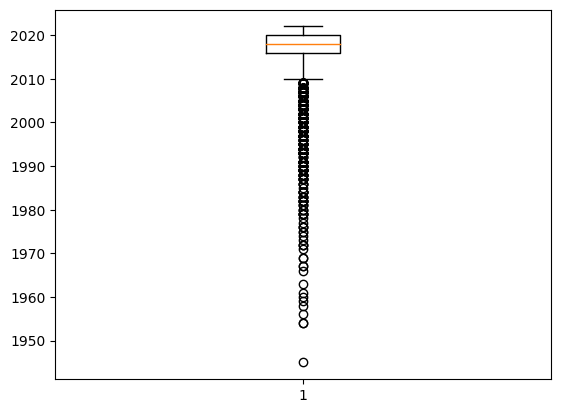

runtime


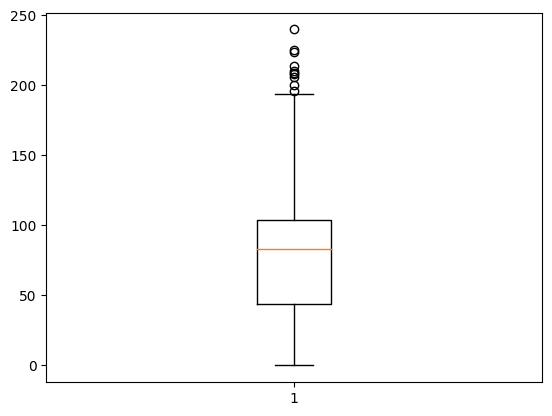

seasons


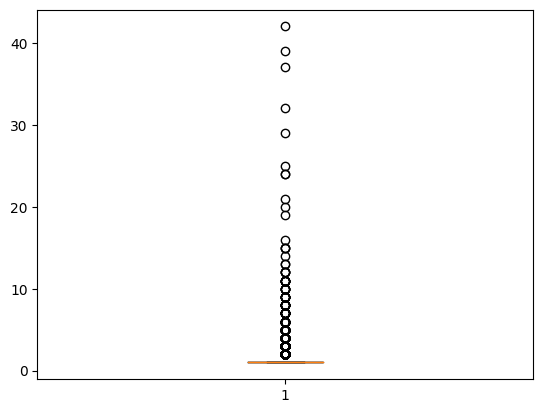

imdb_score


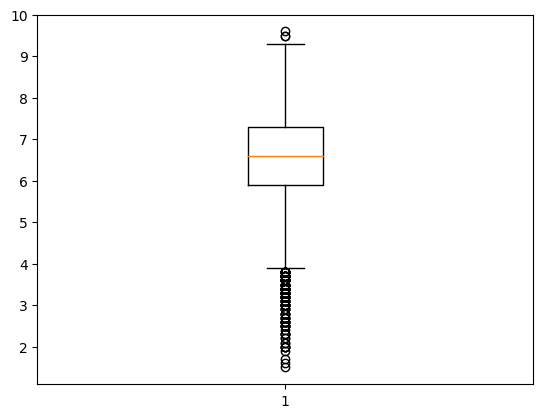

imdb_votes


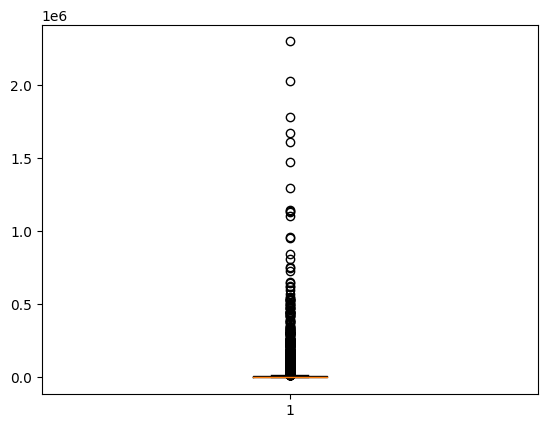

tmdb_popularity


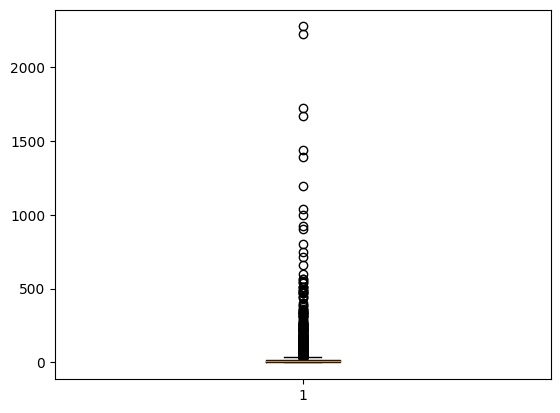

tmdb_score


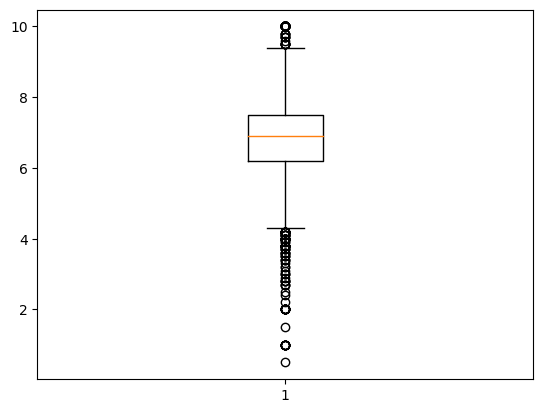

In [14]:
#Check for outliers
from scipy.stats import zscore
for cols in numerical_columns:
    z_score =zscore(titles[cols])
    outliers = titles[np.abs(z_score) > 3]
    plt.boxplot(titles[cols])
    print(cols)
    plt.show()

# PLOTTING AND VISUALIZATION



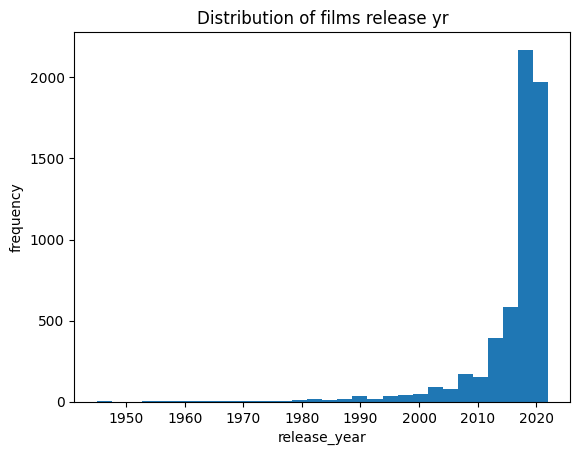

In [15]:
plt.title("Distribution of films release yr")
plt.xlabel("release_year")
plt.ylabel("frequency")
plt.hist(titles['release_year'], bins=30)
plt.show()


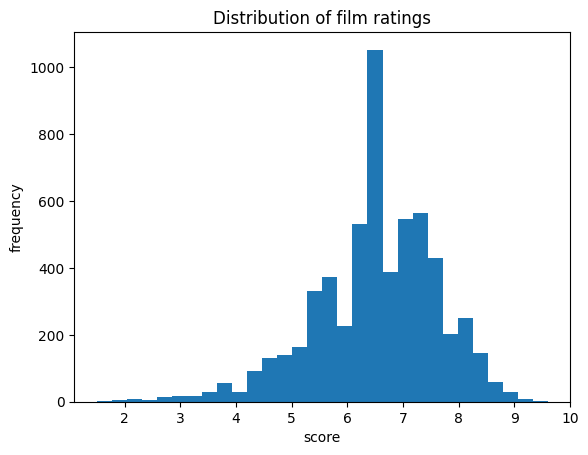

In [16]:
plt.title("Distribution of film ratings")
plt.xlabel("score")
plt.ylabel("frequency")
plt.hist(titles['imdb_score'], bins=30)
plt.show()


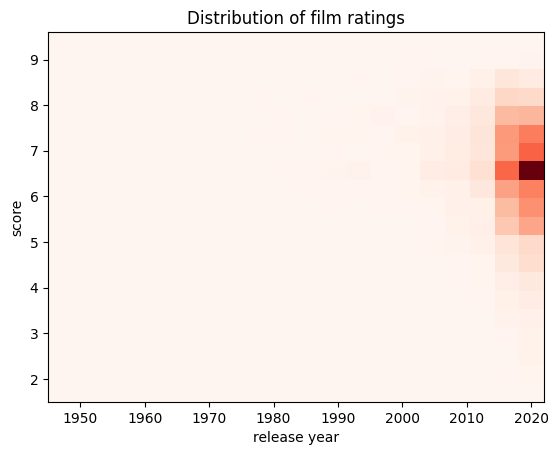

In [17]:
plt.title("Distribution of film ratings")
plt.xlabel("release year")
plt.ylabel("score")
plt.hist2d(titles['release_year'],titles['imdb_score'], bins=(20,20), cmap='Reds')
plt.show()


/tmp/ipykernel_18/862717372.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(titles['release_year'], titles['seasons'], titles['imdb_score'], s=40, marker='o', cmap=cmap, alpha=1)
/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


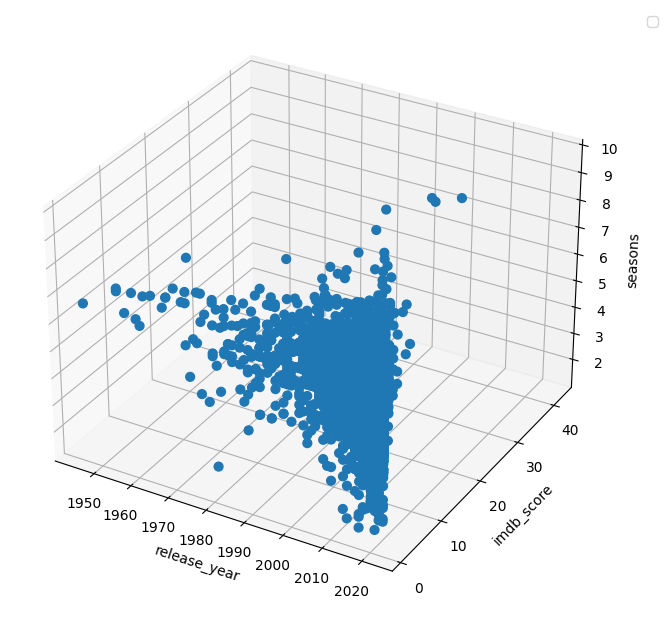

In [18]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(titles['release_year'], titles['seasons'], titles['imdb_score'], s=40, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('release_year')
ax.set_ylabel('imdb_score')
ax.set_zlabel('seasons')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')